This notebook is used to model the frequency response we *should* expect to get from the species that were inside AZKABAN

In [11]:
import os
import numpy as np
import pandas as pd
from scipy.io import loadmat
from scipy import signal
from scipy import optimize
from scipy import linalg
from scipy.interpolate import UnivariateSpline
import matplotlib
import matplotlib.pyplot as plt
import array as arr
import seaborn as sns
import random
import pylab
import glob
from scipy import stats
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import datetime

import inverse_method_funs as inv

In [12]:
sns.set_theme(style="whitegrid")
sns.color_palette("viridis", as_cmap=True)
title_font = {
    'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black',
    'weight': 'medium'
}
axis_font = {'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black'}


plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams['font.size']= 15

# Read results from scattering models
Scattering models for the copepods, krill and chaetognaths in the nets were run in ZooScatR, a package that runs PC-DWBA.

In [13]:
fname_sim = '../ZooScatStuff/AZKABAN_Zoopmix_data_plusjelly.feather'
simulations = pd.read_feather(fname_sim)
# Add a row for sigma_bs calculated from TS
simulations['sigbs'] = 10**(simulations.TS/10)

In [14]:
fname_SDWBA = '../../SDWBA_TS/SDWBApackage/SDWBA_AZKABAN_data.mat'
SDWBA_sim = loadmat(fname_SDWBA)
n_iter = 1000
TS_SDWBA = np.reshape(SDWBA_sim['TS_Simplified'],(n_iter*141)).flatten()
FREQ_SDWBA = np.tile(SDWBA_sim['freq_dist'],(n_iter)).flatten()
data = {'freq': FREQ_SDWBA,
        'TS': TS_SDWBA}
 
# Create DataFrame
SDWBA_data = pd.DataFrame(data=data, index = np.arange(len(TS_SDWBA)))

The SDWBA code is from (https://github.com/ccamlr/SDWBA_TS/) and focused on Antarctic Krill, E superba.

We will only used PC-DWBA for all.Tested and flexible.

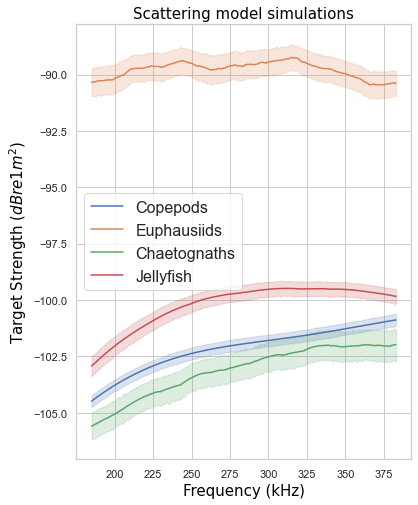

In [15]:
plt.figure(figsize=(6,8))
sns.lineplot(data=simulations, x='freq', y='TS', hue='spec')
#sns.lineplot(data=SDWBA_data, x='freq', y='TS', label='SDWBA-Euphausiid', color='k')
plt.legend(fontsize=16)
plt.ylabel('Target Strength ($dB re 1 m^{2}$)', axis_font)
plt.xlabel('Frequency (kHz)', axis_font)
plt.title('Scattering model simulations', title_font);